### David Hudson
#### CDS 486
#### Homework 2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

For the analysis of travel route data, a data set containing information on the geolocation and speed of a tracked car was given. The following table will give a statistical summary of the variables in this data.

In [2]:
GeoData = pd.read_csv('file1.csv', ',') #File read in 'file1.csv'
GeoData.describe() #Original Summary Statistics

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,41.663934,-87.307773,192.319649,39.329404,63.294246,10.458831
std,0.083421,0.254616,19.384816,18.335309,29.507759,6.429008
min,41.592181,-87.638856,171.000000,0.000000,0.000000,5.000000
25%,41.604792,-87.530962,182.000000,28.000000,45.000000,10.000000
50%,41.616590,-87.323511,185.000000,40.500000,65.200000,10.000000
75%,41.710130,-87.133026,191.000000,48.175000,77.475000,10.000000
max,41.877575,-86.754688,266.000000,100.500000,161.700000,98.216204


In [15]:
#Max and Min Calulations
print(GeoData['speedkmh'].max()) 
print(GeoData['speedkmh'].min())

161.7
0.0


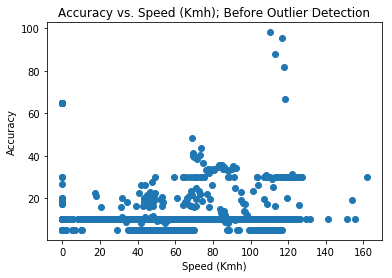

In [7]:
#Plotting Accuracy vs. Speed using Matplotlib
plt.scatter( GeoData['speedkmh'], GeoData['accuracy']);
plt.ylabel('Accuracy');
plt.xlabel('Speed (Kmh)');
plt.title('Accuracy vs. Speed (Kmh); Before Outlier Detection');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


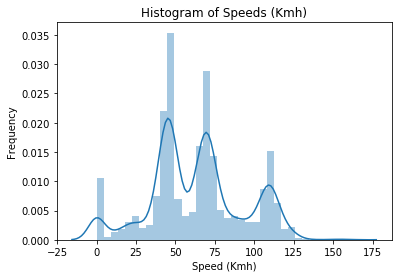

In [3]:
#Plotting Distribution of SpeedKmh using seaborn distplot function
ax = sns.distplot(GeoData['speedkmh']);
ax.set(xlabel='Speed (Kmh)', ylabel='Frequency', title = 'Histogram of Speeds (Kmh)');

### Outlier Detection Discussion: Speed Kmh
Looking at the above data we see the car traveled at any speed between 0.0 and 161.7 kilometers per hour. The summary statistics show that the Speed (Kmh) data has a relatively large standard deviation at 29.507, which is the largest of all the sets of data. This is represented in a histogram of Speed (Kmh) where we see a trimodal graph with centers around 45, 70, and 110 Kmh. Logically this makes sense as with any car drive there are different speeds that one maintains, such as city and highway speeds. As we look ahead to cleaning this data set Speed (Kmh) does not seem to be a good candidate to start eliminating values. If I were to eliminate values at 2 standard deviations this would make a speed of 0 Kmh an outlier, this would be illogical as there were times in which the car was stopped, such as at stop lights. Even if  I were to use three standard deviations this would make all values in the data set within those standard deviations.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


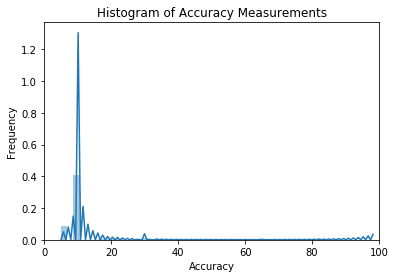

In [16]:
#Plotting Distribution of Accuracy using seaborn distplot function
ax1 = sns.distplot(GeoData['accuracy']);
ax1.set(xlim = (0,100), xlabel = 'Accuracy', ylabel = 'Frequency', title = 'Histogram of Accuracy Measurements');

### Outlier Detection Discussion: Accuracy
When we look at the statistics for the Accuracy measurement, we see the smallest standard deviation and a relatively large range from 5 to 98.21. The histogram for this data is very narrow centered around 10 and an extreme right skew reaching all the way out to that max value of 98.21. Accuracy looks to be an ideal choice to base outlier detection on due to its narrow histogram. For a further comparison of the distribution of Speed (Kmh) values and Accuracy values we can look at the above scatter plot.
### Outlier Detection:
We see how the Speed values stretch evenly throughout its entire range, but the Accuracy values have obvious outliers stretching up its range outside of 2 of its standard deviations. For the outlier removal I chose to remove all values 2 standard deviations away from the mean of the Accuracy measures. The resulting scatter plot of Speed (Kmh) and Accuracy is also below. 

In [17]:
### For outlier detection I decided to remove values that were two standard deviations to the mean, this was mostly inspired by the extremely narrow accuracy histogram.
MuSpeed = GeoData['accuracy'].mean()
OutlierMark = 2 * GeoData['accuracy'].std()
CleanGeoData = GeoData.loc[(GeoData['accuracy'] > (MuSpeed - OutlierMark)) & (GeoData['accuracy'] < (MuSpeed + OutlierMark))]
CleanGeoData.describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000
mean,41.664843,-87.313425,191.561564,38.750457,62.362404,9.403229
std,0.083399,0.251500,17.859321,17.903881,28.813276,2.499493
min,41.592379,-87.638186,171.000000,0.000000,0.000000,5.000000
25%,41.604842,-87.532677,182.000000,27.800000,44.800000,10.000000
50%,41.616239,-87.324962,185.000000,39.600000,63.700000,10.000000
75%,41.711694,-87.138243,191.000000,46.700000,75.100000,10.000000
max,41.872075,-86.754688,266.000000,96.500000,155.300000,23.152697


### The Difference After Removal:
The removal of outlier brought the amount of values from 2850 to 2,737, 96.03 percent of the original values very close the 95% that is assumed to lie within 2 standard deviations of the mean. The standard deviation of Accuracy significantly dropped from 6.42 to 2.49 and reduced the standard deviation of the Altitude measurement from 19.38 to 17.86 most likely meaning that inaccurate values were recorded at higher altitudes.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


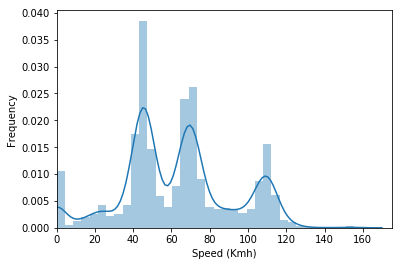

In [19]:
#Distribution of Speed Kmh after outlier removal using seaborn
ax = sns.distplot(CleanGeoData['speedkmh']);
ax.set(xlabel='Speed (Kmh)', ylabel='Frequency', xlim = (0,175));

However, the distribution of Speed (Kmh) did not change much at all still being distinctly trimodal and containing a max value of 155.3, even the standard deviation only decreased by 0.74.

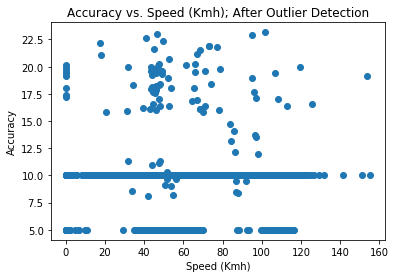

In [10]:
#Scatter plot of Speed Kmh vs Accuracy using matplotlib
plt.scatter( CleanGeoData['speedkmh'], CleanGeoData['accuracy']);
plt.ylabel('Accuracy');
plt.xlabel('Speed (Kmh)');
plt.title('Accuracy vs. Speed (Kmh); After Outlier Detection');

### Comparison to previous scatter plot
This removal also significantly reduced the range of Accuracy values and focused on an interesting anomaly. The Accuracy values seem to cluster around 10.0 and 5.0. Further analysis shows that 2169 (77.1%) values have an Accuracy value of 10. We can also see a pattern that as the speed of the vehicle increased values with an Accuracy of above 10 started to decrease.

In [11]:
#selecting values of the clean data with accuracies of 10 and 5 using .loc
CleanGeoData.loc[CleanGeoData['accuracy'] == 10].describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.0
mean,41.670269,-87.324261,192.547257,39.531397,63.619364,10.0
std,0.086020,0.262483,18.922514,17.813454,28.667566,0.0
min,41.592379,-87.638186,171.000000,0.000000,0.000000,10.0
25%,41.604724,-87.540583,182.000000,27.800000,44.700000,10.0
50%,41.619394,-87.378712,185.000000,41.400000,66.600000,10.0
75%,41.717789,-87.082345,193.000000,47.800000,77.000000,10.0
max,41.872075,-86.755283,266.000000,96.500000,155.300000,10.0


In [12]:
CleanGeoData.loc[CleanGeoData['accuracy'] == 5].describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.0
mean,41.638673,-87.253372,186.856223,35.687339,57.431760,5.0
std,0.063612,0.181564,7.725863,17.845956,28.721005,0.0
min,41.596420,-87.635442,177.000000,0.000000,0.000000,5.0
25%,41.607517,-87.256538,183.000000,28.000000,45.000000,5.0
50%,41.613882,-87.220090,185.000000,29.200000,47.000000,5.0
75%,41.620652,-87.178734,188.000000,41.700000,67.075000,5.0
max,41.799261,-86.759924,258.000000,72.400000,116.500000,5.0


In [21]:
#Using https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html for zipping file
#Using https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html for .shp file
CleanGeoData['Coordinates'] = list(zip(CleanGeoData['longitude'], CleanGeoData['latitude']));
CleanGeoData['Coordinates'] = CleanGeoData['Coordinates'].apply(Point);
gdf = gpd.GeoDataFrame(CleanGeoData, geometry='Coordinates');
usa = gpd.read_file('cb_2017_us_state_500k.shp');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


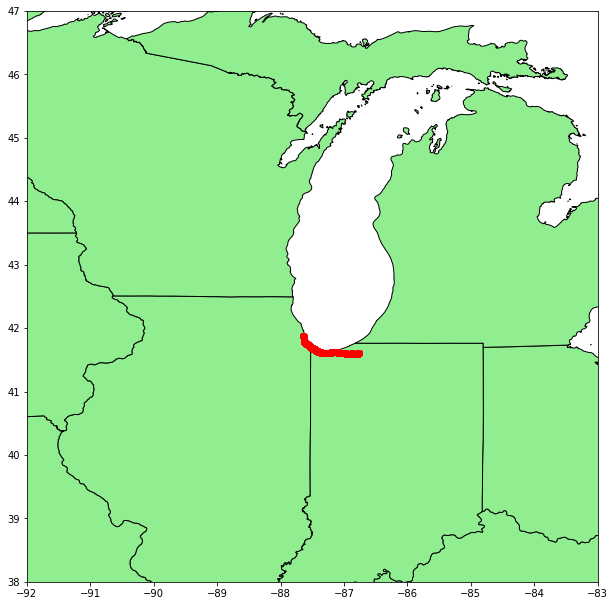

In [22]:
#Using https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html for graph
#plotted using matplotlib functions and setting the parameters for a better graph
ax = usa.plot(
    color='lightgreen', edgecolor='black');

ax.set_xlim(-92, -83);
ax.set_ylim( 38, 47);

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red');

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

plt.show();

In [23]:
import math

#Below Function Was Found At: https://gist.github.com/rochacbruno/2883505
#This function takes to geolocation points as input then uses those longitudes and latitude. It then mathematically determines the length in meters between the two points by taking into account the curvature of the earth
#and the distance of the geolocated points.
def DistanceKm(Origin, Destination):
    Lat1, Lon1 = Origin
    Lat2, Lon2 = Destination
    Radius = 6371 # km

    DLat = math.radians(Lat2-Lat1)
    DLon = math.radians(Lon2-Lon1)

    A = math.sin(DLat/2) * math.sin(DLat/2) + math.cos(math.radians(Lat1)) * math.cos(math.radians(Lat2)) * math.sin(DLon/2) * math.sin(DLon/2)
    C = 2 * math.atan2(math.sqrt(A), math.sqrt(1-A))
    D = Radius * C

    return D

#Because of earlier cleaning the indexes need to be reset for the for loop
#I use the above distance to find the distance between a single geo point and the next geo point. I then sum these for the total distance traveled.
gdf = gdf.reset_index(drop=True)
FullDistance = sum([DistanceKm((gdf['latitude'][i], gdf['longitude'][i]),(gdf['latitude'][i+1], gdf['longitude'][i+1])) for i in  range(int(gdf.count()[0]) - 1)])
CrowFlies = DistanceKm((gdf['latitude'][0], gdf['longitude'][0]), (gdf['latitude'][-1:], gdf['longitude'][-1:])) #Distance From beggining to end directly.
print(FullDistance)
print(CrowFlies)

91.50164597295422
79.16184472544414


### Mapped Out:
Last let’s look at the travel route of this vehicle. By using the geolocation and geopandas package in Python I was able to plot the path of travel on the United States map. Above we see the vehicle state in Illinois around the Chicago, Illinois area. The vehicle then proceeds southeast along the Lake Michigan coast in Indiana. In total the vehicle traveled a total of 91.5 Km on the road, a distance of 79.16 Km directly from start to finish.